In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Load the IMDb dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words (among top max_features most common words)
embedding_dim = 50

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure consistent input length
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# Create the CNN model
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(input_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(input_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 202ms/step - accuracy: 0.6545 - loss: 0.5817 - val_accuracy: 0.8732 - val_loss: 0.3032
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 124ms/step - accuracy: 0.9173 - loss: 0.2192 - val_accuracy: 0.8962 - val_loss: 0.2563
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9729 - loss: 0.0905 - val_accuracy: 0.9020 - val_loss: 0.2833
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.9938 - loss: 0.0277 - val_accuracy: 0.8932 - val_loss: 0.3878
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 103ms/step - accuracy: 0.9987 - loss: 0.0062 - val_accuracy: 0.8988 - val_loss: 0.4229
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.9999 - loss: 0.0022 - val_accuracy: 0.9000 - val_loss: 0.4858
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.9979 - loss: 0.0069 - val_accuracy: 0.8940 - val_loss: 0.5394
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 135ms/step - accuracy: 0.9967 - loss: 0.

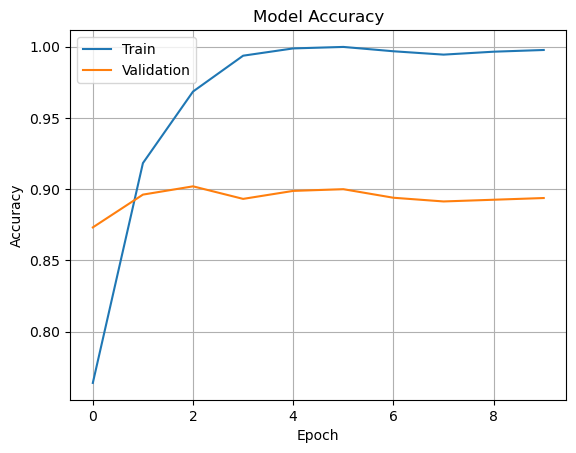

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation') 
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()